In [1]:
%pylab inline 
%load_ext autoreload
%autoreload 2
from lenstools import ConvergenceMap , ShearMap
import lenstools
import sys
sys.path.insert(0,'/Users/dl264294/Desktop/github/flowpm/')
sys.path.insert(0,'/Users/dl264294/Desktop/github/DifferentiableHOS/')
sys.path.insert(0,'/Users/dl264294/.conda/envs/env_nbody/lib/python3.8/site-packages/lenstools/')
from lenstools.utils.defaults import load_fits_default_convergence, measure_power_spectrum
from lenstools.simulations import PotentialPlane,RayTracer,DensityPlane, Plane
from DifferentiableHOS.angular_power_tf import measure_power_spectrum_tf
from astropy.io import fits
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.units import deg,Mpc,m,lyr,rad
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
tracer= RayTracer(lens_mesh_size=64)


In [4]:
for i in range(9):
    header=Plane.readHeader("/Users/dl264294/Desktop/github/flowpm/notebooks/export_lens_plans"+str(i)+'.fits')
    lens_specification=DensityPlane.load("/Users/dl264294/Desktop/github/flowpm/notebooks/export_lens_plans"+str(i)+'.fits').potential()
    tracer.addLens(lens_specification)


In [5]:
Plane.readHeader("/Users/dl264294/Desktop/github/flowpm/notebooks/export_lens_plans2.fits")

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   64                                                  
NAXIS2  =                   64                                                  
EXTEND  =                    T                                                  
H0      =                100.0 / Hubble constant in km/s/( h^{-1} Mpc)          
HIERARCH h =   0.6773999929428101 / Unitless Hubble constant                    
W0      =                 -1.0 / First order term of dark energy equation       
WA      =                  0.0 / Second order term of dark energy equation of st
ANGLE   =                  5.0 / Side angle in degrees                          
OMEGA_M =   0.3074999749660492 /  Dark Matter density                           
OMEGA_L =   0.69249999523162

In [6]:
tracer.reorderLenses()

Text(0.5, 1.0, 'Lensing potential $\\Psi$')

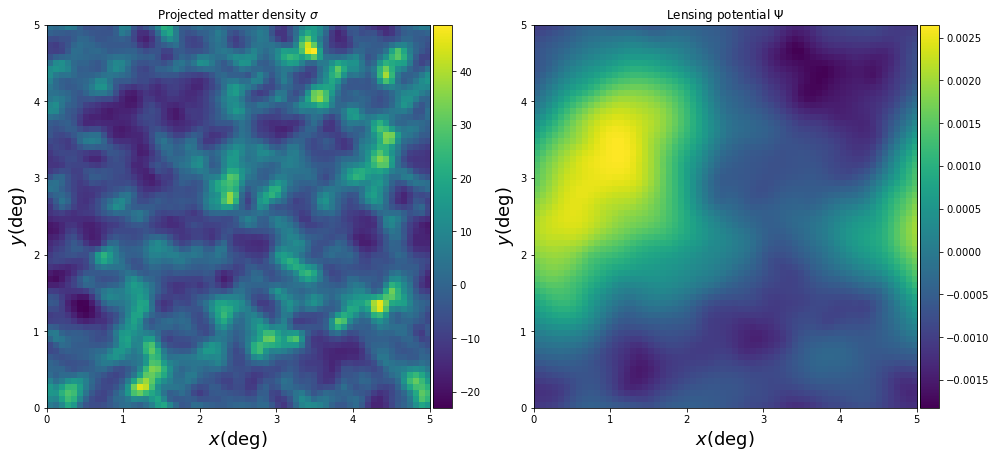

In [7]:
fig,ax = plt.subplots(1,2,figsize=(16,8))

#Compute and visualize the density and corresponding lensing potential
tracer.lens[8].density().visualize(fig,ax[0],colorbar=True)
tracer.lens[8].visualize(fig,ax[1],colorbar=True)


ax[0].set_title(r"Projected matter density $\sigma$")
ax[1].set_title(r"Lensing potential $\Psi$")
#savefig('lens.png',dpi=80)

In [8]:
xgrid, ygrid = meshgrid(linspace(0.,5.),  # range of X coordinates
                        linspace(0.,5.) )# range of Y coordinates

In [9]:
initial_condition=(xgrid, ygrid)*deg

In [13]:
kmap=tracer.convergenceBorn(initial_condition,z=0.77)

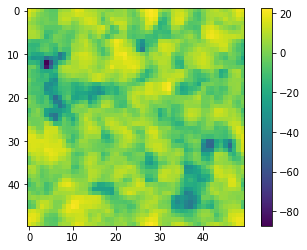

In [12]:
imshow(kmap)
colorbar()


In [ ]:
#Random things 

In [ ]:
test=fits.open('/Users/dl264294/Downloads/Maps10/WLonv/WLconv_z1.00_0001r.fits')
data=test[0].data

In [ ]:
Plane.readHeader('/Users/dl264294/Downloads/Maps10/WLonv/WLconv_z1.00_0001r.fits')

In [ ]:
test_map = ConvergenceMap.load("/Users/dl264294/Downloads/Maps10/WLonv/WLconv_z1.00_0001r.fits")
l_edges = np.arange(200.0,5000.0,200.0)
l,Pl = test_map.powerSpectrum(l_edges)
ell, ps_example = measure_power_spectrum_tf(tf.cast(data,dtype=tf.complex64),3.5,515)

In [ ]:
loglog(l, Pl, label='mnu map lenstools')
loglog(ell, ps_example, label='mnu map tensorflow')
xlabel('$\ell$')
ylabel('$C_{\ell}$')
legend()

In [ ]:
test_k=fits.open('/Users/dl264294/Desktop/github/flowpm/notebooks/export_lens.fits')
data_k=test_k[0].data

In [ ]:
test_kmap= ConvergenceMap.load('/Users/dl264294/Desktop/github/flowpm/notebooks/export_lens.fits')

In [ ]:
imshow(tracer.convergenceBorn(initial_condition,z=0.76))
colorbar()
savefig('lens_kmap.png',dpi=80)

In [ ]:
l_edges_kmap = np.arange(200.0,5000.0,200.0)
l_k,Pl_k = test_kmap.powerSpectrum(l_edges_kmap)
ell_k, ps_example_k = measure_power_spectrum_tf(tf.cast(data_k,dtype=tf.complex64),5.,64)

In [ ]:
loglog(l_k,Pl_k ,label='k map lenstools')
loglog(ell_k, ps_example_k, label='k map tensorflow')
xlabel('$\ell$')
ylabel('$C_{\ell}$')
savefig('power_an.png',dpi=80)
legend()